# 《红楼梦》文本分析

In [4]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import jieba
from pandas import read_csv
from wordcloud import WordCloud,ImageColorGenerator 
from pandas import Timestamp
from pylab import * 
from pandas import DataFrame
from scipy import *
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.decomposition import LatentDirichletAllocation
import nltk
from nltk.cluster.util import cosine_distance
from nltk.cluster.kmeans import KMeansClusterer
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx

# 分词

In [2]:
try:
    with open("data/stop_words.txt") as f:
        lines = f.readlines()
    for line in lines:
        print(line)
except UnicodeDecodeError as e:
    print("错误",e)

$

0

1

2

3

4

5

6

7

8

9

?

1.

2.

3.

4.

5.

6.

7.

8.

9.

0.

.

_

“

”

、

。

《

》

一

一些

一何

一切

一则

一方面

一旦

一来

一样

一般

一转眼

万一

上

上下

下

不

不仅

不但

不光

不单

不只

不外乎

不如

不妨

不尽

不尽然

不得

不怕

不惟

不成

不拘

不料

不是

不比

不然

不特

不独

不管

不至于

不若

不论

不过

不问

与

与其

与其说

与否

与此同时

且

且不说

且说

两者

个

个别

临

为

为了

为什么

为何

为止

为此

为着

乃

乃至

乃至于

么

之

之一

之所以

之类

乌乎

乎

乘

也

也好

也罢

了

二来

于

于是

于是乎

云云

云尔

些

亦

人

人们

人家

什么

什么样

今

介于

仍

仍旧

从

从此

从而

他

他人

他们

以

以上

以为

以便

以免

以及

以故

以期

以来

以至

以至于

以致

们

任

任何

任凭

似的

但

但凡

但是

何

何以

何况

何处

何时

余外

作为

你

你们

使

使得

例如

依

依据

依照

便于

俺

俺们

倘

倘使

倘或

倘然

倘若

借

假使

假如

假若

傥然

像

儿

先不先

光是

全体

全部

兮

关于

其

其一

其中

其二

其他

其余

其它

其次

具体地说

具体说来

兼之

内

再

再其次

再则

再有

再者

再者说

再说

冒

冲

况且

几

几时

凡

凡是

凭

凭借

出于

出来

分别

则

则甚

别

别人

别处

别是

别的

别管

别说

到

前后

前此

前者

加之

加以

即

即令

即使

即便

即如

即或

即若

却

去

又

又及

及

及其

及至

反之

反而

反过来

反过来说

受到

另

另一方面

另外

另悉

只

只当

只怕

只是

只有

只消

只要

只

In [3]:
# 读取停用词和需要的词典
stopwords = pd.read_csv("data/stop_words.txt",header=None,names=["Stopwords"])
my_dict = pd.read_csv("data/red_dictionary.txt",header=None,names=["Dictionary"])
stopwords

,Stopwords
0,$
1,0
2,1
3,2
4,3
...,...
2082,沙沙
2083,甭
2084,会
2085,砰


In [4]:
my_dict

,Dictionary
0,皑皑轻趁步
1,爱彼之貌容兮
2,爱才好客
3,艾官
4,暗渡陈仓
...,...
4385,座上珠玑昭日月堂前黼黻焕烟霞
4386,昨夜朱楼梦
4387,昨尤我画
4388,且听下回分解


In [5]:
data = pd.read_csv("data/red.txt",header=None,names=["Data"])

In [6]:
data

,Data
0,第1卷
1,第一回 甄士隐梦幻识通灵 贾雨村风尘怀闺秀
2,此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真事隐去，而借“通灵”之说，撰此<<...
3,此回中凡用“梦”用“幻”等字，是提醒阅者眼目，亦是此书立意本旨。
4,列位看官：你道此书从何而来？说起根由虽近荒唐，细按则深有趣味。待在下将此来历注明，方使阅...
...,...
3049,这一日空空道人又从青埂峰前经过，见那补天未用之石仍在那里，上面字迹依然如旧，又从头的细细...
3050,那空空道人牢牢记着此言，又不知过了几世几劫，果然有个悼红轩，见那曹雪芹先生正在那里翻阅历...
3051,那空空道人听了，仰天大笑，掷下抄本，飘然而去。一面走着，口中说道：“果然是敷衍荒唐！不但...
3052,说到辛酸处，荒唐愈可悲。


In [7]:
# 查看数据是否有空白行
np.sum(pd.isnull(data))

Data    0
dtype: int64

In [8]:
# 删除卷数据，使用正则表达式
# 包含相应关键字的索引
index_juan = data.Data.str.contains("^第+.+卷")
# 删除不需要的字段，并重新设置索引
data = data[~index_juan].reset_index(drop=True)
data

,Data
0,第一回 甄士隐梦幻识通灵 贾雨村风尘怀闺秀
1,此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真事隐去，而借“通灵”之说，撰此<<...
2,此回中凡用“梦”用“幻”等字，是提醒阅者眼目，亦是此书立意本旨。
3,列位看官：你道此书从何而来？说起根由虽近荒唐，细按则深有趣味。待在下将此来历注明，方使阅...
4,原来女娲氏炼石补天之时，于大荒山无稽崖练成高经十二丈，方经二十四丈顽石三万六千五百零一块...
...,...
3046,这一日空空道人又从青埂峰前经过，见那补天未用之石仍在那里，上面字迹依然如旧，又从头的细细...
3047,那空空道人牢牢记着此言，又不知过了几世几劫，果然有个悼红轩，见那曹雪芹先生正在那里翻阅历...
3048,那空空道人听了，仰天大笑，掷下抄本，飘然而去。一面走着，口中说道：“果然是敷衍荒唐！不但...
3049,说到辛酸处，荒唐愈可悲。


In [9]:
# 找出每一章节的头部索引和尾部索引
# 每一章的标题
index_hui = data.Data.str.match("^第+.+回")
chap_name  = data.Data[index_hui].reset_index(drop=True)
chap_name

0        第一回 甄士隐梦幻识通灵 贾雨村风尘怀闺秀
1        第二回 贾夫人仙逝扬州城 冷子兴演说荣国府
2        第三回 贾雨村夤缘复旧职 林黛玉抛父进京都
3        第四回 薄命女偏逢薄命郎 葫芦僧乱判葫芦案
4        第五回 游幻境指迷十二钗 饮仙醪曲演红楼梦
                ...           
115    第一一六回 得通灵幻境悟仙缘 送慈柩故乡全孝道
116    第一一七回 阻超凡佳人双护玉 欣聚党恶子独承家
117    第一一八回 记微嫌舅兄欺弱女 惊谜语妻妾谏痴人
118    第一一九回 中乡魁宝玉却尘缘 沐皇恩贾家延世泽
119    第一二零回 甄士隐详说太虚情 贾雨村归结红楼梦
Name: Data, Length: 120, dtype: object

In [10]:
# 处理章节名，按照空格分隔字符串
chap_name_split = chap_name.str.split(" ").reset_index(drop=True)
chap_name_split

0        [第一回, 甄士隐梦幻识通灵, 贾雨村风尘怀闺秀]
1        [第二回, 贾夫人仙逝扬州城, 冷子兴演说荣国府]
2        [第三回, 贾雨村夤缘复旧职, 林黛玉抛父进京都]
3        [第四回, 薄命女偏逢薄命郎, 葫芦僧乱判葫芦案]
4        [第五回, 游幻境指迷十二钗, 饮仙醪曲演红楼梦]
                  ...             
115    [第一一六回, 得通灵幻境悟仙缘, 送慈柩故乡全孝道]
116    [第一一七回, 阻超凡佳人双护玉, 欣聚党恶子独承家]
117    [第一一八回, 记微嫌舅兄欺弱女, 惊谜语妻妾谏痴人]
118    [第一一九回, 中乡魁宝玉却尘缘, 沐皇恩贾家延世泽]
119    [第一二零回, 甄士隐详说太虚情, 贾雨村归结红楼梦]
Name: Data, Length: 120, dtype: object

In [11]:
# 建立保存数据的数据表
data_df = pd.DataFrame(list(chap_name_split),columns=["章节","Left","Right"])
data_df

,章节,Left,Right
0,第一回,甄士隐梦幻识通灵,贾雨村风尘怀闺秀
1,第二回,贾夫人仙逝扬州城,冷子兴演说荣国府
2,第三回,贾雨村夤缘复旧职,林黛玉抛父进京都
3,第四回,薄命女偏逢薄命郎,葫芦僧乱判葫芦案
4,第五回,游幻境指迷十二钗,饮仙醪曲演红楼梦
...,...,...,...
115,第一一六回,得通灵幻境悟仙缘,送慈柩故乡全孝道
116,第一一七回,阻超凡佳人双护玉,欣聚党恶子独承家
117,第一一八回,记微嫌舅兄欺弱女,惊谜语妻妾谏痴人
118,第一一九回,中乡魁宝玉却尘缘,沐皇恩贾家延世泽


In [12]:
# 添加新的变量
data_df["chapter2"] = np.arange(1,121)
data_df["章节名称"] = data_df.Left+","+data_df.Right
data_df

,章节,Left,Right,chapter2,章节名称
0,第一回,甄士隐梦幻识通灵,贾雨村风尘怀闺秀,1,"甄士隐梦幻识通灵,贾雨村风尘怀闺秀"
1,第二回,贾夫人仙逝扬州城,冷子兴演说荣国府,2,"贾夫人仙逝扬州城,冷子兴演说荣国府"
2,第三回,贾雨村夤缘复旧职,林黛玉抛父进京都,3,"贾雨村夤缘复旧职,林黛玉抛父进京都"
3,第四回,薄命女偏逢薄命郎,葫芦僧乱判葫芦案,4,"薄命女偏逢薄命郎,葫芦僧乱判葫芦案"
4,第五回,游幻境指迷十二钗,饮仙醪曲演红楼梦,5,"游幻境指迷十二钗,饮仙醪曲演红楼梦"
...,...,...,...,...,...
115,第一一六回,得通灵幻境悟仙缘,送慈柩故乡全孝道,116,"得通灵幻境悟仙缘,送慈柩故乡全孝道"
116,第一一七回,阻超凡佳人双护玉,欣聚党恶子独承家,117,"阻超凡佳人双护玉,欣聚党恶子独承家"
117,第一一八回,记微嫌舅兄欺弱女,惊谜语妻妾谏痴人,118,"记微嫌舅兄欺弱女,惊谜语妻妾谏痴人"
118,第一一九回,中乡魁宝玉却尘缘,沐皇恩贾家延世泽,119,"中乡魁宝玉却尘缘,沐皇恩贾家延世泽"


In [13]:
# 每段的开始行（段）索引
data_df["Start_"] = index_hui[index_hui==True].index 
# 每章的结束行数
data_df["End_"] = data_df["Start_"][1:len(data_df["Start_"])].reset_index(drop=True) - 1
data_df["End_"][[len(data_df["End_"]) -  1]] = data.index[-1]

# 每章的段落长度
data_df['length_chaps']= data_df.End_ - data_df.Start_
data_df["Artical"] = "Artical"
data_df

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1898/3572454398.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["End_"][[len(data_df["End_"]) -  1]] = data.index[-1]


,章节,Left,Right,chapter2,章节名称,Start_,End_,length_chaps,Artical
0,第一回,甄士隐梦幻识通灵,贾雨村风尘怀闺秀,1,"甄士隐梦幻识通灵,贾雨村风尘怀闺秀",0,49.0,49.0,Artical
1,第二回,贾夫人仙逝扬州城,冷子兴演说荣国府,2,"贾夫人仙逝扬州城,冷子兴演说荣国府",50,79.0,29.0,Artical
2,第三回,贾雨村夤缘复旧职,林黛玉抛父进京都,3,"贾雨村夤缘复旧职,林黛玉抛父进京都",80,118.0,38.0,Artical
3,第四回,薄命女偏逢薄命郎,葫芦僧乱判葫芦案,4,"薄命女偏逢薄命郎,葫芦僧乱判葫芦案",119,148.0,29.0,Artical
4,第五回,游幻境指迷十二钗,饮仙醪曲演红楼梦,5,"游幻境指迷十二钗,饮仙醪曲演红楼梦",149,235.0,86.0,Artical
...,...,...,...,...,...,...,...,...,...
115,第一一六回,得通灵幻境悟仙缘,送慈柩故乡全孝道,116,"得通灵幻境悟仙缘,送慈柩故乡全孝道",2916,2941.0,25.0,Artical
116,第一一七回,阻超凡佳人双护玉,欣聚党恶子独承家,117,"阻超凡佳人双护玉,欣聚党恶子独承家",2942,2962.0,20.0,Artical
117,第一一八回,记微嫌舅兄欺弱女,惊谜语妻妾谏痴人,118,"记微嫌舅兄欺弱女,惊谜语妻妾谏痴人",2963,2987.0,24.0,Artical
118,第一一九回,中乡魁宝玉却尘缘,沐皇恩贾家延世泽,119,"中乡魁宝玉却尘缘,沐皇恩贾家延世泽",2988,3017.0,29.0,Artical


In [14]:
# 每章节的内容
for li in data_df.index:
    # 将内容用“”连接
    chap_id = np.arange(data_df.Start_[li]+1,int(data_df.End_[li]))
    # 每章节内容替换掉空格
    data_df["Artical"][li] = "".join(list(data.Data[chap_id])).replace("\u3000","")
# 计算每章有多少字
data_df["lenzi"] = data_df.Artical.apply(len)

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1898/208606283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Artical"][li] = "".join(list(data.Data[chap_id])).replace("\u3000","")
/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1898/208606283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df["Artical"][li] = "".join(list(data.Data[chap_id])).replace("\u3000","")
/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1898/208606283.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [15]:
data_df

,章节,Left,Right,chapter2,章节名称,Start_,End_,length_chaps,Artical,lenzi
0,第一回,甄士隐梦幻识通灵,贾雨村风尘怀闺秀,1,"甄士隐梦幻识通灵,贾雨村风尘怀闺秀",0,49.0,49.0,此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真事隐去，而借“通灵”之说，撰此<<石头...,7594
1,第二回,贾夫人仙逝扬州城,冷子兴演说荣国府,2,"贾夫人仙逝扬州城,冷子兴演说荣国府",50,79.0,29.0,诗云一局输赢料不真，香销茶尽尚逡巡。欲知目下兴衰兆，须问旁观冷眼人。却说封肃因听见公差传唤，...,5659
2,第三回,贾雨村夤缘复旧职,林黛玉抛父进京都,3,"贾雨村夤缘复旧职,林黛玉抛父进京都",80,118.0,38.0,却说雨村忙回头看时，不是别人，乃是当日同僚一案参革的号张如圭者。他本系此地人，革后家居，今打...,8332
3,第四回,薄命女偏逢薄命郎,葫芦僧乱判葫芦案,4,"薄命女偏逢薄命郎,葫芦僧乱判葫芦案",119,148.0,29.0,却说黛玉同姊妹们至王夫人处，见王夫人与兄嫂处的来使计议家务，又说姨母家遭人命官司等语。因见王...,5841
4,第五回,游幻境指迷十二钗,饮仙醪曲演红楼梦,5,"游幻境指迷十二钗,饮仙醪曲演红楼梦",149,235.0,86.0,第四回中既将薛家母子在荣府内寄居等事略已表明，此回则暂不能写矣。如今且说林黛玉自在荣府以来，...,7401
...,...,...,...,...,...,...,...,...,...,...
115,第一一六回,得通灵幻境悟仙缘,送慈柩故乡全孝道,116,"得通灵幻境悟仙缘,送慈柩故乡全孝道",2916,2941.0,25.0,话说宝玉一听麝月的话，身往后仰，复又死去，急得王夫人等哭叫不止。麝月自知失言致祸，此时王夫人...,6551
116,第一一七回,阻超凡佳人双护玉,欣聚党恶子独承家,117,"阻超凡佳人双护玉,欣聚党恶子独承家",2942,2962.0,20.0,话说王夫人打发人来叫宝钗过去商量，宝玉听见说是和尚在外头，赶忙的独自一人走到前头，嘴里乱嚷道...,7129
117,第一一八回,记微嫌舅兄欺弱女,惊谜语妻妾谏痴人,118,"记微嫌舅兄欺弱女,惊谜语妻妾谏痴人",2963,2987.0,24.0,说话邢王二夫人听尤氏一段话，明知也难挽回。王夫人只得说道：“姑娘要行善，这也是前生的夙根，我...,7285
118,第一一九回,中乡魁宝玉却尘缘,沐皇恩贾家延世泽,119,"中乡魁宝玉却尘缘,沐皇恩贾家延世泽",2988,3017.0,29.0,话说莺儿见宝玉说话摸不着头脑，正自要走，只听宝玉又说道：“傻丫头，我告诉你罢。你姑娘既是有造...,9339


[FontEntry(fname='/System/Library/Fonts/STHeiti Light.ttc', name='Heiti TC', style='normal', variant='normal', weight=300, stretch='normal', size='scalable'), FontEntry(fname='/System/Library/Fonts/STHeiti Medium.ttc', name='Heiti TC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')]


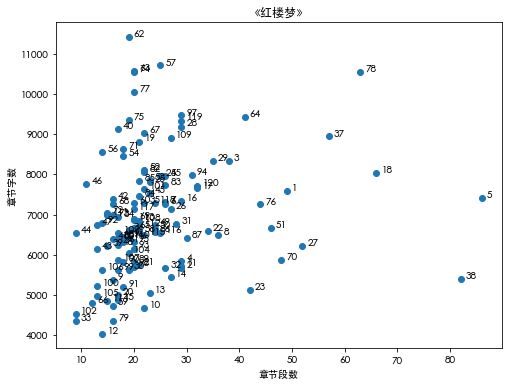

In [16]:
import matplotlib
print([f for f in matplotlib.font_manager.fontManager.ttflist if 'Heiti' in f.name])
matplotlib.rcParams['font.family'] = ['Heiti TC']
# 字长和段落数的散点图一
plt.figure(figsize=(8,6))
plt.scatter(data_df.length_chaps,data_df.lenzi)
for li in data_df.index:
    plt.text(data_df.length_chaps[li]+1,data_df.lenzi[li],data_df.chapter2[li])
plt.xlabel("章节段数")
plt.ylabel("章节字数")
plt.title("《红楼梦》")
plt.show()

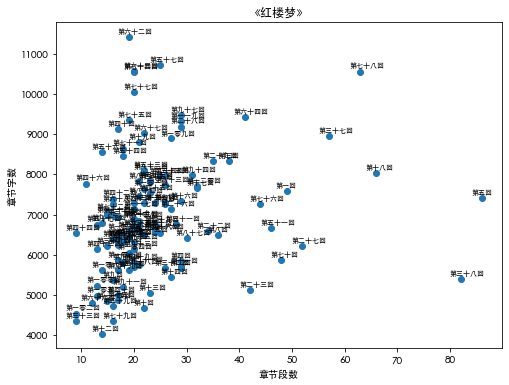

In [17]:
# # 字长和段落数的散点图二
plt.figure(figsize=(8,6))
plt.scatter(data_df.length_chaps,data_df.lenzi)
for li in data_df.index:
    plt.text(data_df.length_chaps[li]-2,data_df.lenzi[li]+100,data_df.章节[li],size=7)
plt.xlabel("章节段数")
plt.ylabel("章节字数")
plt.title("《红楼梦》")
plt.show()

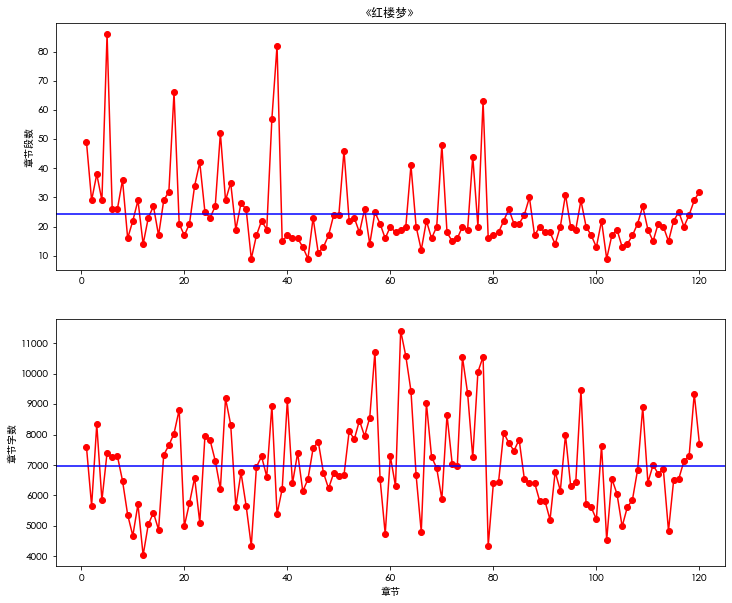

In [18]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
plt.plot(data_df.chapter2,data_df.length_chaps,"ro-",label="段落")
plt.ylabel("章节段数")
plt.title("《红楼梦》")
# 添加平均值
plt.hlines(np.mean(data_df.length_chaps),-5,125,"b")
plt.xlim((-5,125))
plt.subplot(2,1,2)
plt.plot(data_df.chapter2,data_df.lenzi,"ro-",label="段落")
plt.xlabel("章节")
plt.ylabel("章节字数")
# 添加平均值
plt.hlines(np.mean(data_df.lenzi),-5,125,"b")
plt.xlim((-5,125))
plt.show()

In [19]:
# 分词
import jieba 
# 对全文进行分词 -- 数据表的行数
row,col = data_df.shape
# 预定义列表
data_df["cutword"] = "cutword"
for li in np.arange(row):
    # 分词
    cutwords = list(jieba.cut(data_df.Artical[li],cut_all=True))
    # 去除长度为1的词
    cutwords = pd.Series(cutwords)[pd.Series(cutwords).apply(len)>1]
    # 去除停用词
    cutwords = cutwords[~cutwords.isin(stopwords)]
    data_df.cutword[li] = cutwords.values


Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/jieba.cache
Loading model cost 0.888 seconds.
Prefix dict has been built successfully.
/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1898/480465665.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df.cutword[li] = cutwords.values


In [20]:
cutwords.values

array(['不好', '连忙', '进去', ..., '辛酸', '荒唐', '可悲'], dtype=object)

In [21]:
cutwords

10       不好
12       连忙
13       进去
17      巧姐儿
18       姐儿
       ... 
5676     一竿
5677     竿头
5682     辛酸
5685     荒唐
5687     可悲
Length: 2373, dtype: object

In [22]:
data_df.cutword

0      [开卷, 第一, 第一回, 一回, 作者, 一番, 梦幻, 之后, 真事, 隐去, 之说, ...
1      [诗云, 一局, 输赢, 逡巡, 目下, 兴衰, 旁观, 冷眼, 却说, 封肃, 听见, 公...
2      [却说, 回头, 不是, 别人, 乃是, 当日, 同僚, 一案, 张如圭, 本系, 此地, ...
3      [却说, 姊妹, 王夫人, 夫人, 王夫人, 夫人, 兄嫂, 计议, 家务, 姨母, 遭人,...
4      [第四, 第四回, 四回, 回中, 家母, 母子, 荣府内, 寄居, 事略, 表明, 暂不,...
                             ...                        
115    [宝玉, 的话, 往后, 往后仰, 后仰, 死去, 王夫人, 夫人, 哭叫, 不止, 自知,...
116    [王夫人, 夫人, 打发, 发人, 过去, 商量, 宝玉, 听见, 和尚, 在外, 外头, ...
117    [说话, 邢王二, 王二夫人, 夫人, 一段, 一段话, 明知, 挽回, 王夫人, 夫人, ...
118    [宝玉, 说话, 摸不着, 摸不着头脑, 不着, 头脑, 听宝玉, 宝玉, 说道, ：“, ...
119    [不好, 连忙, 进去, 巧姐儿, 姐儿, 平儿, 随着, 走到, 只见, 人心, 心痛, ...
Name: cutword, Length: 120, dtype: object

In [23]:
# 连接list
words = np.concatenate(data_df.cutword)
# 统计词频
word_df = pd.DataFrame({"Word":words})
word_df

,Word
0,开卷
1,第一
2,第一回
3,一回
4,作者
...,...
250221,一竿
250222,竿头
250223,辛酸
250224,荒唐


In [24]:
# word_stat = word_df.groupby(["Word"])["Word"].agg(number=np.size)
word_stat = pd.DataFrame(word_df.groupby(["Word"])["Word"].agg(number=np.size)).reset_index()["number"]
word_stat

0          30
1           1
2          13
3           1
4           3
         ... 
26042       1
26043      72
26044    1776
26045       1
26046       4
Name: number, Length: 26047, dtype: int64

In [25]:
word_stat=word_stat.reset_index().sort_values(by="number",ascending=False)

In [26]:
word_stat["wordlen"] = word_stat.Word.apply(len)


AttributeError: 'DataFrame' object has no attribute 'Word'

In [ ]:
print(np.where(word_stat.Word.apply(len)<5))
word_stat = word_stat.loc[word_stat.Word.apply(len)<5,:]
word_stat = word_stat.sort_values(by="number",ascending=False)
word_stat

(array([    0,     1,     2, ..., 26044, 26045, 26046]),)


,Word,number,wordlen
26028,：“,10117,2
76,。”,8142,2
9674,宝玉,3862,2
8664,太太,1862,2
3039,什么,1792,2
...,...,...,...
21066,花招,1,2
21067,花插,1,2
21068,花更艳,1,3
21069,花月夜,1,3


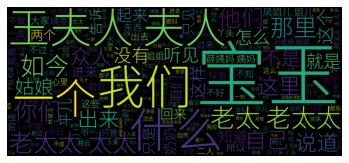

In [ ]:
# 连接全书的词
"/".join(np.concatenate(data_df.cutword))
wlread = WordCloud(font_path="res/han.otf",margin=5,width=1800,height=800).generate("/".join(np.concatenate(data_df.cutword)))
plt.imshow(wlread)
plt.axis("off")
plt.show()

In [ ]:
# 使用{词语：频率}字典形式通过generate_from_frequencies()生成词云
word_dict={}
for key,value in zip(word_stat.Word,word_stat.number):
    word_dict[key] = value
# 生成词云
for li ,my_word in zip(range(11),word_dict.items()):
    print(li)
    print(my_word)

0
('：“', 10117)
1
('。”', 8142)
2
('宝玉', 3862)
3
('太太', 1862)
4
('什么', 1792)
5
('？”', 1776)
6
('一个', 1492)
7
('夫人', 1411)
8
('我们', 1189)
9
('那里', 1143)
10
('姑娘', 1105)


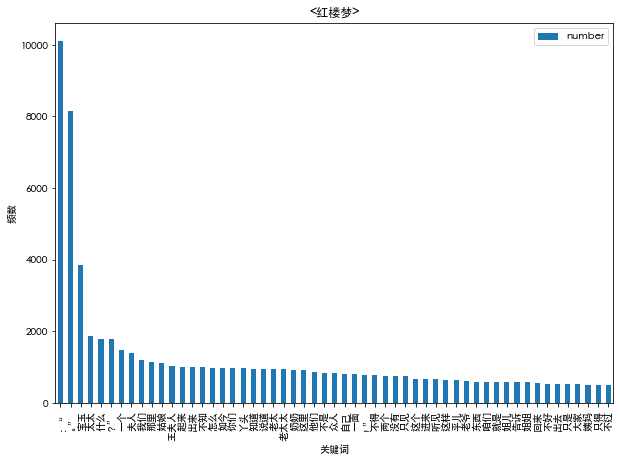

In [ ]:
# 绘制词语出现的次数大于500次的直方图
# 筛选数据
newdata = word_stat.loc[word_stat.number > 500]
# 绘制直方图
newdata.plot(kind="bar",x="Word",y="number",figsize=(10,7))
plt.xticks(size=10)
plt.xlabel("关键词")
plt.ylabel("频数")
plt.title("<红楼梦>")
plt.show()

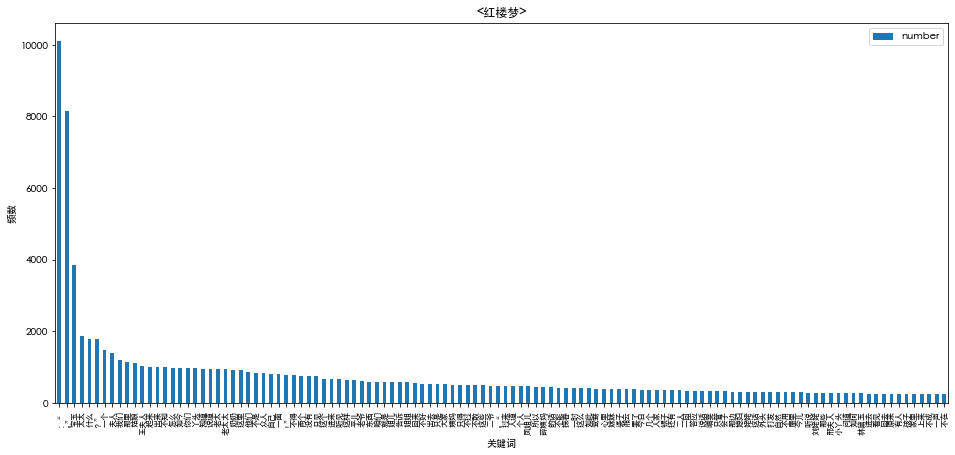

In [ ]:
# 绘制词语出现的次数大于500次的直方图
# 筛选数据
newdata = word_stat.loc[word_stat.number > 250]
# 绘制直方图
newdata.plot(kind="bar",x="Word",y="number",figsize=(16,7))
plt.xticks(size=8)
plt.xlabel("关键词")
plt.ylabel("频数")
plt.title("<红楼梦>")
plt.show()

In [ ]:
# 保存数据
data_df

,章节,Left,Right,chapter2,章节名称,Start_,End_,length_chaps,Artical,lenzi,cutword
0,第一回,甄士隐梦幻识通灵,贾雨村风尘怀闺秀,1,"甄士隐梦幻识通灵,贾雨村风尘怀闺秀",0,49.0,49.0,此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真事隐去，而借“通灵”之说，撰此<<石头...,7594,"[开卷, 第一, 第一回, 一回, 作者, 一番, 梦幻, 之后, 真事, 隐去, 之说, ..."
1,第二回,贾夫人仙逝扬州城,冷子兴演说荣国府,2,"贾夫人仙逝扬州城,冷子兴演说荣国府",50,79.0,29.0,诗云一局输赢料不真，香销茶尽尚逡巡。欲知目下兴衰兆，须问旁观冷眼人。却说封肃因听见公差传唤，...,5659,"[诗云, 一局, 输赢, 逡巡, 目下, 兴衰, 旁观, 冷眼, 却说, 封肃, 听见, 公..."
2,第三回,贾雨村夤缘复旧职,林黛玉抛父进京都,3,"贾雨村夤缘复旧职,林黛玉抛父进京都",80,118.0,38.0,却说雨村忙回头看时，不是别人，乃是当日同僚一案参革的号张如圭者。他本系此地人，革后家居，今打...,8332,"[却说, 回头, 不是, 别人, 乃是, 当日, 同僚, 一案, 张如圭, 本系, 此地, ..."
3,第四回,薄命女偏逢薄命郎,葫芦僧乱判葫芦案,4,"薄命女偏逢薄命郎,葫芦僧乱判葫芦案",119,148.0,29.0,却说黛玉同姊妹们至王夫人处，见王夫人与兄嫂处的来使计议家务，又说姨母家遭人命官司等语。因见王...,5841,"[却说, 姊妹, 王夫人, 夫人, 王夫人, 夫人, 兄嫂, 计议, 家务, 姨母, 遭人,..."
4,第五回,游幻境指迷十二钗,饮仙醪曲演红楼梦,5,"游幻境指迷十二钗,饮仙醪曲演红楼梦",149,235.0,86.0,第四回中既将薛家母子在荣府内寄居等事略已表明，此回则暂不能写矣。如今且说林黛玉自在荣府以来，...,7401,"[第四, 第四回, 四回, 回中, 家母, 母子, 荣府内, 寄居, 事略, 表明, 暂不,..."
...,...,...,...,...,...,...,...,...,...,...,...
115,第一一六回,得通灵幻境悟仙缘,送慈柩故乡全孝道,116,"得通灵幻境悟仙缘,送慈柩故乡全孝道",2916,2941.0,25.0,话说宝玉一听麝月的话，身往后仰，复又死去，急得王夫人等哭叫不止。麝月自知失言致祸，此时王夫人...,6551,"[宝玉, 的话, 往后, 往后仰, 后仰, 死去, 王夫人, 夫人, 哭叫, 不止, 自知,..."
116,第一一七回,阻超凡佳人双护玉,欣聚党恶子独承家,117,"阻超凡佳人双护玉,欣聚党恶子独承家",2942,2962.0,20.0,话说王夫人打发人来叫宝钗过去商量，宝玉听见说是和尚在外头，赶忙的独自一人走到前头，嘴里乱嚷道...,7129,"[王夫人, 夫人, 打发, 发人, 过去, 商量, 宝玉, 听见, 和尚, 在外, 外头, ..."
117,第一一八回,记微嫌舅兄欺弱女,惊谜语妻妾谏痴人,118,"记微嫌舅兄欺弱女,惊谜语妻妾谏痴人",2963,2987.0,24.0,说话邢王二夫人听尤氏一段话，明知也难挽回。王夫人只得说道：“姑娘要行善，这也是前生的夙根，我...,7285,"[说话, 邢王二, 王二夫人, 夫人, 一段, 一段话, 明知, 挽回, 王夫人, 夫人, ..."
118,第一一九回,中乡魁宝玉却尘缘,沐皇恩贾家延世泽,119,"中乡魁宝玉却尘缘,沐皇恩贾家延世泽",2988,3017.0,29.0,话说莺儿见宝玉说话摸不着头脑，正自要走，只听宝玉又说道：“傻丫头，我告诉你罢。你姑娘既是有造...,9339,"[宝玉, 说话, 摸不着, 摸不着头脑, 不着, 头脑, 听宝玉, 宝玉, 说道, ：“, ..."


In [ ]:
data_df.to_json("output/new_data_df.json")

In [ ]:
data_df.to_csv("output/new_data_df.csv")

* 工具函数（词云和直方图）

In [ ]:
def plot_word_cloud(wordlist,title,figsize=(6,6)):
    ''' 
    绘制一个list的词云
    wordlist:词语组成
    title:图片名字
    '''
    words = wordlist
    name = title 
    word_df = pd.DataFrame({"Word":words})
    word_stat = pd.DataFrame(word_df.groupby(["Word"])["Word"].agg(number=np.size)).reset_index()["number"]
    word_stat = word_stat.reset_index().sort_values(by='number',ascending=False)
    word_stat["wordlen"] = word_stat.Word.apply(len)

    word_dict={}
    for key,value in zip(word_stat.Word,word_stat.number):
        word_dict[key] = value
    # 生成词云
    red_wc = WordCloud(font_path="res/han.otf",margin=5,width=1800,height=1800).generate_from_frequencies(frequencies=word_dict)
    plt.figure(figsize=figsize)
    plt.imshow(red_wc)
    plt.axis("off")
    plt.title(name,size=12)
    plt.show()

In [ ]:
def plot_tredman_fre(wordlist,title,figsize=(12,6)):
    """
    该函数用来统计一个list的人物频率
    wordlist：词组成的一个列表
    title : 图的名字
    """
    ## 统计词频
    words = wordlist
    name = title
    word_df = pd.DataFrame({"Word":words})
    word_stat= word_df.groupby(by=["Word"])["Word"].agg({"number":np.size})
    word_stat = word_stat.reset_index().sort_values(by="number",ascending=False)
    wordname = word_stat.loc[word_stat.Word.isin(word_stat.iloc[:,0].values)].reset_index(drop = True)
    ## 直方图
    ## 绘制直方图
    size = np.min([np.max([6,np.ceil(300 / wordname.shape[0])]),12])
    wordname.plot(kind="bar",x="Word",y="number",figsize=(10,6))
    plt.xticks(size = size)
    plt.xlabel("人名")
    plt.ylabel("频数")
    plt.title(name)
    plt.show()

# 文本聚类分析

In [ ]:
data_df

,章节,Left,Right,chapter2,章节名称,Start_,End_,length_chaps,Artical,lenzi,cutword
0,第一回,甄士隐梦幻识通灵,贾雨村风尘怀闺秀,1,"甄士隐梦幻识通灵,贾雨村风尘怀闺秀",0,49.0,49.0,此开卷第一回也。作者自云：因曾历过一番梦幻之后，故将真事隐去，而借“通灵”之说，撰此<<石头...,7594,"[开卷, 第一, 第一回, 一回, 作者, 一番, 梦幻, 之后, 真事, 隐去, 之说, ..."
1,第二回,贾夫人仙逝扬州城,冷子兴演说荣国府,2,"贾夫人仙逝扬州城,冷子兴演说荣国府",50,79.0,29.0,诗云一局输赢料不真，香销茶尽尚逡巡。欲知目下兴衰兆，须问旁观冷眼人。却说封肃因听见公差传唤，...,5659,"[诗云, 一局, 输赢, 逡巡, 目下, 兴衰, 旁观, 冷眼, 却说, 封肃, 听见, 公..."
2,第三回,贾雨村夤缘复旧职,林黛玉抛父进京都,3,"贾雨村夤缘复旧职,林黛玉抛父进京都",80,118.0,38.0,却说雨村忙回头看时，不是别人，乃是当日同僚一案参革的号张如圭者。他本系此地人，革后家居，今打...,8332,"[却说, 回头, 不是, 别人, 乃是, 当日, 同僚, 一案, 张如圭, 本系, 此地, ..."
3,第四回,薄命女偏逢薄命郎,葫芦僧乱判葫芦案,4,"薄命女偏逢薄命郎,葫芦僧乱判葫芦案",119,148.0,29.0,却说黛玉同姊妹们至王夫人处，见王夫人与兄嫂处的来使计议家务，又说姨母家遭人命官司等语。因见王...,5841,"[却说, 姊妹, 王夫人, 夫人, 王夫人, 夫人, 兄嫂, 计议, 家务, 姨母, 遭人,..."
4,第五回,游幻境指迷十二钗,饮仙醪曲演红楼梦,5,"游幻境指迷十二钗,饮仙醪曲演红楼梦",149,235.0,86.0,第四回中既将薛家母子在荣府内寄居等事略已表明，此回则暂不能写矣。如今且说林黛玉自在荣府以来，...,7401,"[第四, 第四回, 四回, 回中, 家母, 母子, 荣府内, 寄居, 事略, 表明, 暂不,..."
...,...,...,...,...,...,...,...,...,...,...,...
115,第一一六回,得通灵幻境悟仙缘,送慈柩故乡全孝道,116,"得通灵幻境悟仙缘,送慈柩故乡全孝道",2916,2941.0,25.0,话说宝玉一听麝月的话，身往后仰，复又死去，急得王夫人等哭叫不止。麝月自知失言致祸，此时王夫人...,6551,"[宝玉, 的话, 往后, 往后仰, 后仰, 死去, 王夫人, 夫人, 哭叫, 不止, 自知,..."
116,第一一七回,阻超凡佳人双护玉,欣聚党恶子独承家,117,"阻超凡佳人双护玉,欣聚党恶子独承家",2942,2962.0,20.0,话说王夫人打发人来叫宝钗过去商量，宝玉听见说是和尚在外头，赶忙的独自一人走到前头，嘴里乱嚷道...,7129,"[王夫人, 夫人, 打发, 发人, 过去, 商量, 宝玉, 听见, 和尚, 在外, 外头, ..."
117,第一一八回,记微嫌舅兄欺弱女,惊谜语妻妾谏痴人,118,"记微嫌舅兄欺弱女,惊谜语妻妾谏痴人",2963,2987.0,24.0,说话邢王二夫人听尤氏一段话，明知也难挽回。王夫人只得说道：“姑娘要行善，这也是前生的夙根，我...,7285,"[说话, 邢王二, 王二夫人, 夫人, 一段, 一段话, 明知, 挽回, 王夫人, 夫人, ..."
118,第一一九回,中乡魁宝玉却尘缘,沐皇恩贾家延世泽,119,"中乡魁宝玉却尘缘,沐皇恩贾家延世泽",2988,3017.0,29.0,话说莺儿见宝玉说话摸不着头脑，正自要走，只听宝玉又说道：“傻丫头，我告诉你罢。你姑娘既是有造...,9339,"[宝玉, 说话, 摸不着, 摸不着头脑, 不着, 头脑, 听宝玉, 宝玉, 说道, ：“, ..."


In [28]:
# 构建分词TF-IDF矩阵
# 将所有分词后的结果用空格连接成为字符串，并组成列表，每一段为列表中的一个元素
articals = []
for cutword in data_df.cutword:
    articals.append(" ".join(cutword))

In [31]:
# 构建语料库，并计算【文档一词】的tf-idf矩阵
vectorizer = CountVectorizer()    
transformer = TfidfVectorizer()
tfidf = transformer.fit_transform(articals)

print(tfidf)

  (0, 14008)	0.016818827094105954
  (0, 12688)	0.009002061109901005
  (0, 21457)	0.006812574259955709
  (0, 17762)	0.01537762277354551
  (0, 6095)	0.023092684887503562
  (0, 24242)	0.012039521568239755
  (0, 8070)	0.018945890447293397
  (0, 2043)	0.014621597501873595
  (0, 3144)	0.006874997756713563
  (0, 14211)	0.017423141005910248
  (0, 1866)	0.018945890447293397
  (0, 23021)	0.013407533483301579
  (0, 10825)	0.017423141005910248
  (0, 25051)	0.0139739757785972
  (0, 3559)	0.019955755990804756
  (0, 10146)	0.007200723312703122
  (0, 8747)	0.02924319500374719
  (0, 14022)	0.023092684887503562
  (0, 14021)	0.009423354085349292
  (0, 25113)	0.017423141005910248
  (0, 22052)	0.023092684887503562
  (0, 6602)	0.007551723321532373
  (0, 17190)	0.016353881762829956
  (0, 16356)	0.014286212109211443
  (0, 15698)	0.014286212109211443
  :	:
  (119, 20299)	0.024220625146170436
  (119, 18408)	0.023090038701722063
  (119, 22649)	0.0620705352371995
  (119, 371)	0.043689648443407704
  (119, 19333)	0

In [32]:
# 将tfidf转换为数组的形式
dtm = tfidf.toarray()
dtm

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

* 使用TF-IDF矩阵对章节进行聚类

In [33]:
# 使用夹角余弦距离进行k均值聚类
kmeans = KMeansClusterer(num_means=3,distance=nltk.cluster.util.cosine_distance)
kmeans.cluster(dtm)

In [37]:
labpre = [kmeans.classify(i) for i in dtm]
kmeanlab = data_df[["章节名称","章节"]]
kmeanlab["cosd_pre"] = labpre
kmeanlab

/var/folders/95/0b9jlx8d4dgdp4pw27fwrd440000gn/T/ipykernel_1898/11938568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kmeanlab["cosd_pre"] = labpre


,章节名称,章节,cosd_pre
0,"甄士隐梦幻识通灵,贾雨村风尘怀闺秀",第一回,0
1,"贾夫人仙逝扬州城,冷子兴演说荣国府",第二回,0
2,"贾雨村夤缘复旧职,林黛玉抛父进京都",第三回,0
3,"薄命女偏逢薄命郎,葫芦僧乱判葫芦案",第四回,2
4,"游幻境指迷十二钗,饮仙醪曲演红楼梦",第五回,1
...,...,...,...
115,"得通灵幻境悟仙缘,送慈柩故乡全孝道",第一一六回,1
116,"阻超凡佳人双护玉,欣聚党恶子独承家",第一一七回,1
117,"记微嫌舅兄欺弱女,惊谜语妻妾谏痴人",第一一八回,1
118,"中乡魁宝玉却尘缘,沐皇恩贾家延世泽",第一一九回,2


In [42]:
# 查看每类有多少个分组
count = kmeanlab.groupby("cosd_pre").count()
count

,章节名称,章节
cosd_pre,,
0,33,33
1,27,27
2,60,60


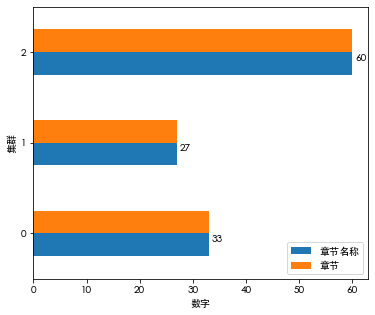

In [43]:
# 可视化
count.plot(kind='barh',figsize=(6,5))
for xx,yy,s in zip(count.index,count.章节名称,count.章节):
    plt.text(y=xx-0.1,x=yy+0.5,s=s)
plt.ylabel("集群")
plt.xlabel("数字")
plt.show()

* MDS降维

In [45]:
# 聚类结果可视化
# 使用MDS对数据进行降维度
from sklearn.manifold import MDS
mds = MDS(n_components=2,random_state=123)
oord = mds.fit_transform(dtm)
oord.shape

(120, 2)

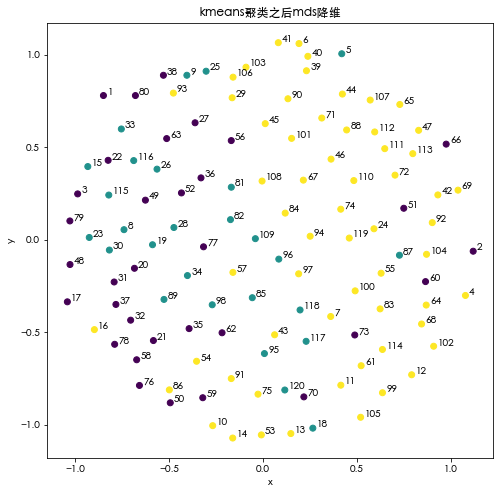

In [48]:
# 绘制降维后的结果
plt.figure(figsize=(8,8))
plt.scatter(oord[:,0],oord[:,1],c=kmeanlab.cosd_pre)
for ii in np.arange(120):
    plt.text(oord[ii,0]+0.02,oord[ii,1],s = data_df.chapter2[ii])
plt.xlabel("x")
plt.ylabel("y")
plt.title("kmeans聚类之后mds降维")
plt.show()


* PCA降维

In [49]:
pca = PCA(n_components=2)
pca.fit(dtm)
print(pca.explained_variance_ratio_)

coord = pca.fit_transform(dtm)
print(coord.shape)

[0.04375599 0.03276366]
(120, 2)


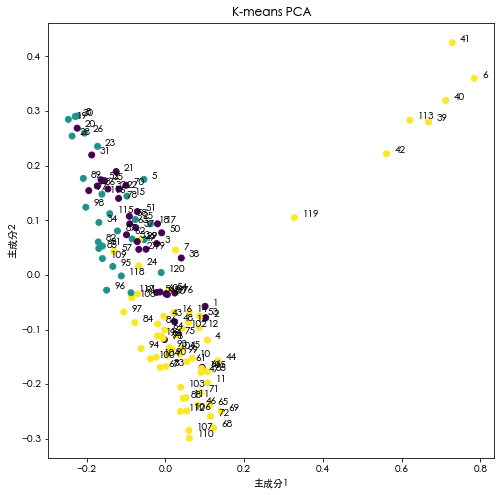

In [50]:
# 绘制图片
plt.figure(figsize=(8,8))
plt.scatter(coord[:,0],coord[:,1],c=kmeanlab.cosd_pre)
for ii in np.arange(120):
    plt.text(coord[ii,0]+0.02,coord[ii,1],s = data_df.chapter2[ii])
plt.xlabel("主成分1",)   
plt.ylabel("主成分2",)  
plt.title("K-means PCA")  
plt.show()

* HC聚类

HC 聚类( Hierarchical Clustering， 层次聚类)是聚类算法的 一种，通过计 算不同类别数据点间的相似度来创建一棵有层次的嵌套聚类树 。 在聚类树中， 不同类别的原始数据点是树的最底层，树的顶层是 一个聚类的根节点。创建聚 类树有自 下而 上合并和自上而下分裂两种方法 。

In [53]:
# 层次聚类
from scipy.cluster.hierarchy import dendrogram,ward
from scipy.spatial.distance import pdist,squareform
# 标签，每个章节的标题
labels = data_df.章节.values
# 计算每章的距离矩阵
cosin_matrix = squareform(pdist(dtm,'cosine'))
ling = ward(cosin_matrix)  

/Users/danyow/envs/myenvs/lib/python3.9/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


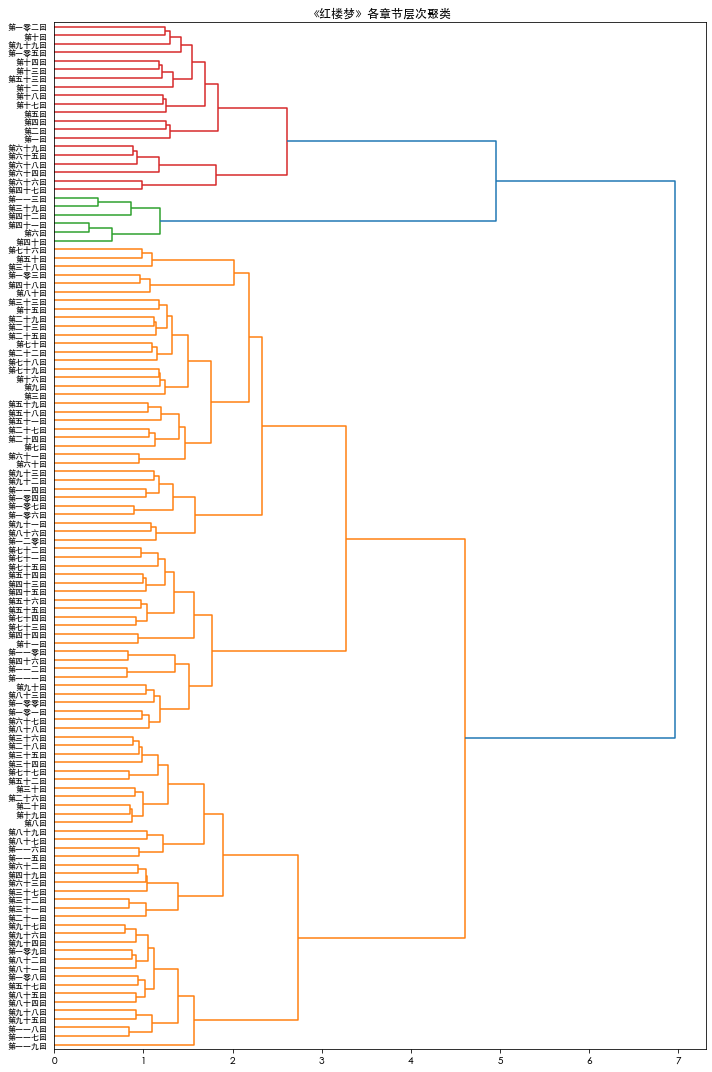

In [55]:
fig, ax = plt.subplots(figsize=(10, 15))
ax = dendrogram(ling,orientation='right', labels=labels)
plt.yticks(size = 8)  #Y轴刻度上的文本
plt.title("《红楼梦》各章节层次聚类")
plt.tight_layout() 
plt.show()

*  t-SNE 高维数据可视化

t-SNE 是一种非线性降维算法，非常适用于高维数据降维到二维或者三 维，并进行可视化。 
t-SNE主要包括以下两个步骤:
1. t-SNE构建一个高维对象之间的概率分布，使得相似的对象被选择的 概率更高，而不相似的对象被选择的概率较低;
2. t-SNE在低维空间里构建这些再点的概率分布，使得这两个概率分布 之间尽可能地相似 。 这里使用虹散度( Kullback - Leibler Divergence ) 来度量 两个分布之间的相似性 。


In [56]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.manifold import TSNE 
# 准备工作 ，将分词后的结果整理成CountVectorizer可应用的形式
# 将所有分词后的结果使用空格连接成为字符串并组成列表，每一段为其中一个元素
articals = []
for cutword in data_df.cutword:
    cutword = [s for s in cutword if len(s) < 5]
    cutword = " ".join(cutword)
    articals.append(cutword)
# max_featurs参数根据出现的频率排序，之区指定的数目
vectorizer = CountVectorizer(max_features=100000)
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(articals))


In [57]:
# 降维为三维
X  =  tfidf.toarray()
tsne =TSNE(n_components=3,metric="cosine",init="random",random_state=1233)
X_tsne = tsne.fit_transform(X)


/Users/danyow/envs/myenvs/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


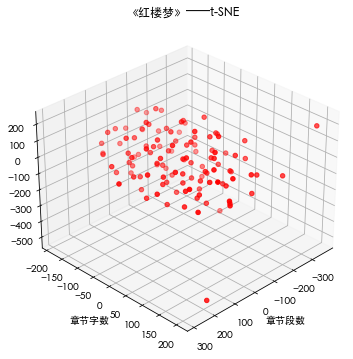

In [58]:
# 可视化
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1,projection = "3d")
ax.scatter(X_tsne[:,0],X_tsne[:,1],X_tsne[:,2],c = "red")
ax.view_init(30,45)
plt.xlabel("章节段数")
plt.ylabel("章节字数")
plt.title("《红楼梦》——t-SNE")
plt.show()

# LDA主题类型
LDA ( Latent Dirichlet Allocation)是一种文档生成模型。它认为一篇文章 是有多个主题的，而每个主题又对应着不同的词 。一篇文章 的构造过程， 首先 是以一定的概率选择某个主题，然后再在这个主题下以一定的概率选出某一个 词，这样就生成了这篇文章的第一个词 。不断重复这个过程，就生成了整篇文 章。当然这里假定词与词之间是没顺序的。

In [69]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# 准备工作,将分词后的结果整理成CountVectorizer（）形式
# 将所有分词后的结果用空格连接成字符串，并组成列表，每一段为列表中的一个元素
articals = []
for cutword in data_df.cutword:
    cutword = [s for s in cutword if len(s) < 5]
    cutword = " ".join(cutword)
    articals.append(cutword)
##max features 参数根据出现的频率排序，只取指定的数目
tf_vectorizer = CountVectorizer(max_features=10000)
tf = tf_vectorizer.fit_transform(articals)

print(tf_vectorizer.get_feature_names()[400:420])
tf.toarray()[20:50,200:800]

['上京', '上任', '上传', '上供', '上元', '上前', '上千', '上半', '上原', '上去', '上司', '上吊', '上夜', '上天', '上头', '上好', '上学', '上家', '上将', '上屋']


/Users/danyow/envs/myenvs/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0]])

上面的代码是建立模型前的准备工作，主要是构建“<u>词频-文档”矩阵</u>。
在下面的代码中，首先建立有 3 个主题的主题模型，然后将文本(每一章) 进行归类。在结果元组中，第一个数组代表章节的索引，第二个数组代表所 归类别的索引。从所归的类别可以看出，所有章节归类的最大可能性是相同的
主题。

In [73]:
# 主题数目
n_topics = 10
lda = LatentDirichletAllocation(n_components=n_topics, max_iter=25, 
                                learning_method='online',                 
                                learning_offset=50., random_state=0)
# 模型应用于数据
lda.fit(tf)



LatentDirichletAllocation(learning_method='online', learning_offset=50.0,
                          max_iter=25, random_state=0)

In [77]:
# 得到每个章节属于某个主题的可能性
chapter_top = pd.DataFrame(lda.transform(tf),index=data_df.chapter2,columns=np.arange(n_topics)+1)
chapter_top
# 每一行的和
chapter_top.apply(sum,axis=1).values
# 查看每一列的最大值
chapter_top.apply(max,axis=1).values
# 找到大于相应值的索引
np.where(chapter_top >= np.min(chapter_top.apply(max,axis=1).values))


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119]),
 array([4, 9, 9, 9, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 4, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9,

/Users/danyow/envs/myenvs/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


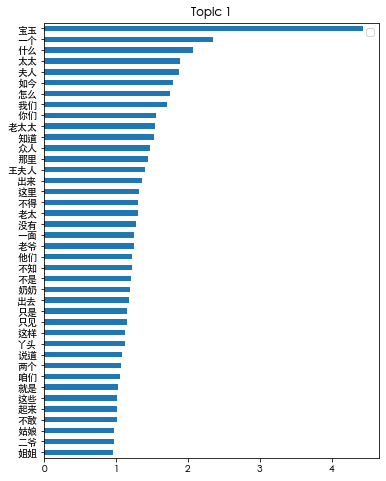

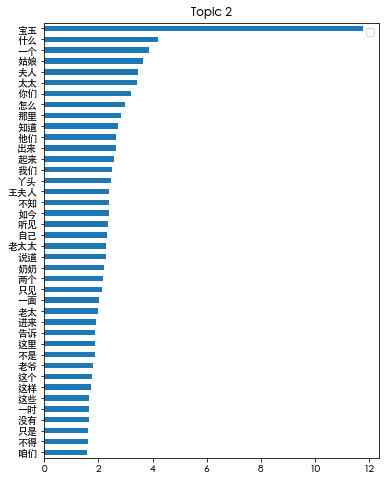

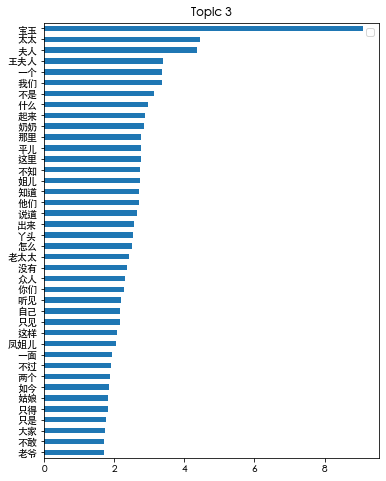

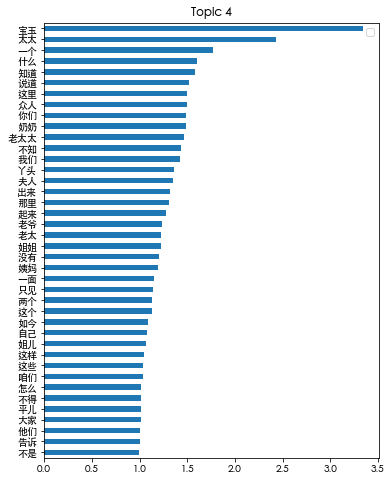

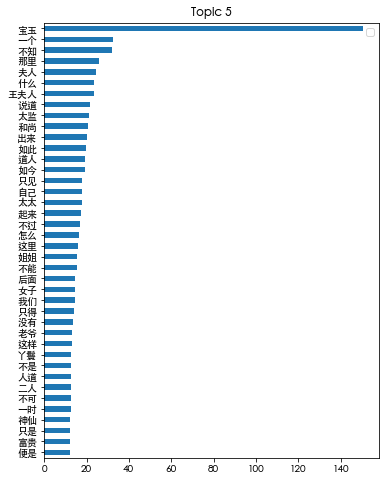

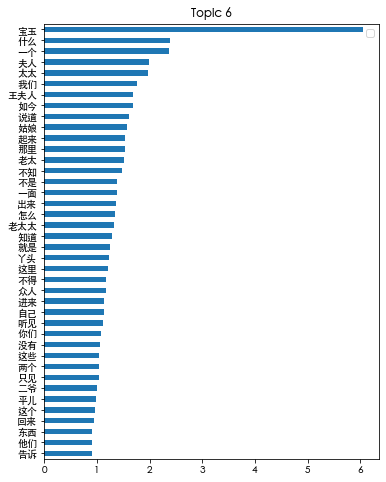

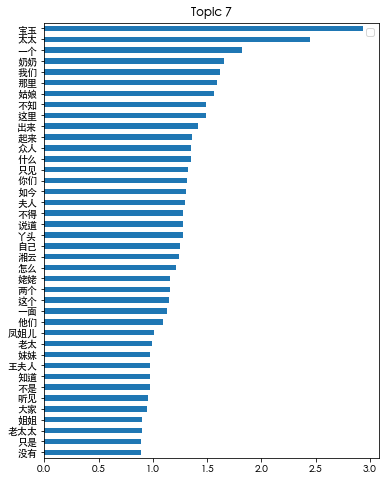

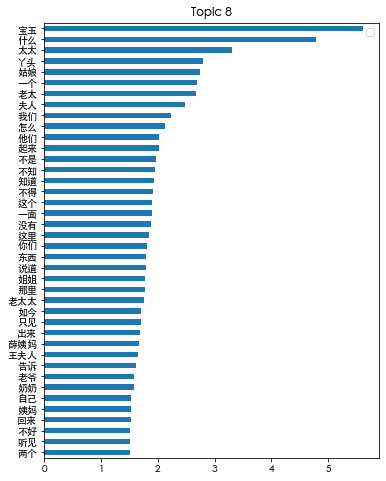

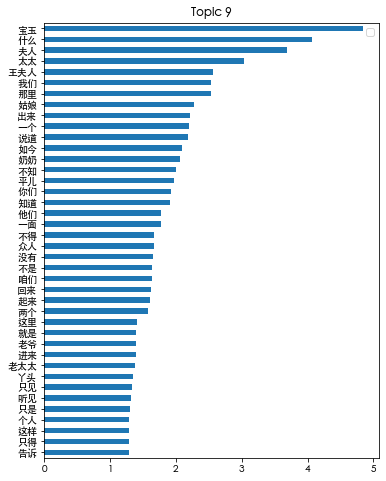

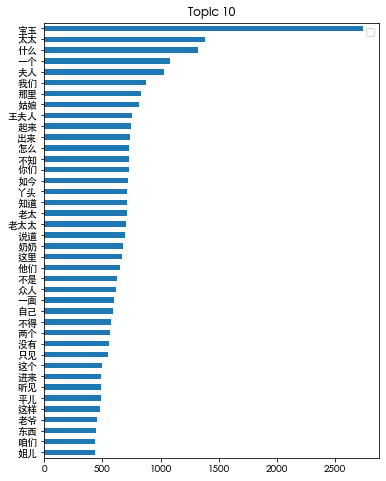

In [78]:
# 可视化主题，主成分分析可视化LDA
from pylab import  *
n_top_words = 40 
tf_feature_names = tf_vectorizer.get_feature_names()
for topic_id,topic in enumerate(lda.components_):
    topword = pd.DataFrame(
        {"word":[tf_feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]],
         "componets":topic[topic.argsort()[:-n_top_words - 1:-1]]})
    topword.sort_values(by = "componets").plot(kind = "barh",
                                               x = "word",
                                               y = "componets",
                                               figsize=(6,8),
                                               legend=False)
    plt.yticks(size = 10)
    plt.ylabel("")
    plt.legend("")
    plt.title("Topic %d" %(topic_id+1))
    plt.show()

In [79]:
# 查看每个主题的关键词
def print_top_words(model,feature_names,n_top_words):
    for topic_id, topic in enumerate(model.components_):
        print('\nTopic Nr.%d:' % int(topic_id + 1)) 
        print(''.join([feature_names[i] + ' ' + str(round(topic[i], 2))
              +' | ' for i in topic.argsort()[:-n_top_words - 1:-1]]))
n_top_words = 10
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topic Nr.1:
宝玉 4.44 | 一个 2.35 | 什么 2.08 | 太太 1.9 | 夫人 1.88 | 如今 1.8 | 怎么 1.75 | 我们 1.71 | 你们 1.56 | 老太太 1.54 | 

Topic Nr.2:
宝玉 11.77 | 什么 4.22 | 一个 3.85 | 姑娘 3.64 | 夫人 3.46 | 太太 3.44 | 你们 3.22 | 怎么 3.0 | 那里 2.82 | 知道 2.74 | 

Topic Nr.3:
宝玉 9.1 | 太太 4.46 | 夫人 4.37 | 王夫人 3.39 | 一个 3.37 | 我们 3.35 | 不是 3.13 | 什么 2.95 | 起来 2.86 | 奶奶 2.85 | 

Topic Nr.4:
宝玉 3.34 | 太太 2.43 | 一个 1.77 | 什么 1.6 | 知道 1.58 | 说道 1.51 | 这里 1.49 | 众人 1.49 | 你们 1.49 | 奶奶 1.48 | 

Topic Nr.5:
宝玉 150.51 | 一个 32.41 | 不知 31.95 | 那里 25.85 | 夫人 24.64 | 什么 23.58 | 王夫人 23.37 | 说道 21.43 | 太监 20.95 | 和尚 20.84 | 

Topic Nr.6:
宝玉 6.05 | 什么 2.39 | 一个 2.36 | 夫人 2.0 | 太太 1.98 | 我们 1.76 | 王夫人 1.69 | 如今 1.68 | 说道 1.62 | 姑娘 1.57 | 

Topic Nr.7:
宝玉 2.94 | 太太 2.45 | 一个 1.82 | 奶奶 1.66 | 我们 1.62 | 那里 1.59 | 姑娘 1.57 | 不知 1.49 | 这里 1.49 | 出来 1.42 | 

Topic Nr.8:
宝玉 5.61 | 什么 4.79 | 太太 3.3 | 丫头 2.8 | 姑娘 2.74 | 一个 2.69 | 老太 2.67 | 夫人 2.48 | 我们 2.23 | 怎么 2.12 | 

Topic Nr.9:
宝玉 4.84 | 什么 4.07 | 夫人 3.68 | 太太 3.03 | 王夫人 2.56 | 我们 2.53 | 那里 2.5

/Users/danyow/envs/myenvs/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# 任务社交网络分析
人物社交网络分析是用来查看节点、连接边之间社会关系的一种分析方 法。节点是社交网络里的每个参与者，连接边则表示参与者之间的关系。节点 之间可以有很多种连接，用最简单的形式来说，社交网络是一张地图，可以 标示出所有与节点间相关的连接边。社交网络也可以用来衡量每个参与者的“人脉”。

* 方法：
* 接下来我们分析《红楼梦》中的人物关系 。 在本章中，两两人物关系是由
下面两种方式得到的:
第一，如果两个人名同时出现在同 一段落，则其联系+ 1; 第二，如果两个人名同时出现在同 一 章节，则其联系+ 1。
首先，我们读取需要的数据和加载需要的包。

In [5]:
import networkx as nx 
import pandas as pd 
# 读取数据
red_df = pd.read_csv("data/social_net_weight.csv")
red_df
''' 
chapweight 为对应的人物出现在同 一 章节的次数
duanweight 为对应的人物出现在同 一 段落的次数 
'''

' \nchapweight 为对应的人物出现在同 一 章节的次数\nduanweight 为对应的人物出现在同 一 段落的次数 \n'

In [6]:
# 计算其中的一种权重
red_df["weight"] = red_df.chapweight/120
red_df2 = red_df[red_df.weight>0.025].reset_index(drop=True)
plt.figure(figsize=(12,12))
# 生成社交网络图
G = nx.Graph() 
# 添加边
for ii in red_df2.index:
    G.add_edge(red_df2.First[ii],red_df2.Second[ii],weight = red_df2.weight[ii])


<Figure size 864x864 with 0 Axes>

In [7]:
# 定义3种边
elarge = [(u,v)for(u,v,d)in G.edges(data=True) if d["weight"] > 0.2 ]

In [8]:
emidle = [(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] >0.1) & (d['weight'] <= 0.2)]

In [9]:
esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.1]


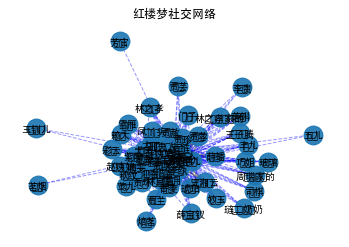

In [21]:
matplotlib.rcParams['font.family'] = ['Heiti TC']
# 图的布局
pos = nx.spring_layout(G)
#节点
nx.draw_networkx_nodes(G,pos,alpha=0.6,node_size=350)
# 边
nx.draw_networkx_nodes(G,pos,alpha=0.8,node_size= 350)
nx.draw_networkx_edges(G,pos,edgelist=elarge,width=2,alpha=0.9,edge_color='g')
nx.draw_networkx_edges(G,pos,edgelist=emidle,width=1.5,alpha=0.6,edge_color='y')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.4,edge_color='b',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=10,font_family="SimHei") 
# 标签
nx.draw_networkx_labels(G,pos,font_size=10)
plt.axis("off")
plt.title("红楼梦社交网络")
plt.show()





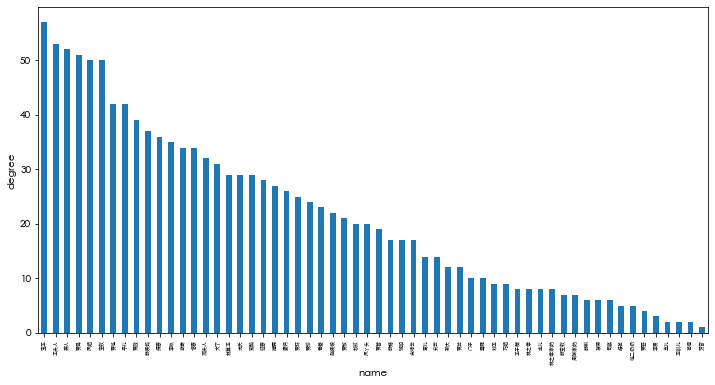

In [22]:
## 计算每个节点的度
Gdegree = nx.degree(G)
Gdegree = dict(Gdegree)
Gdegree = pd.DataFrame({"name":list(Gdegree.keys()),"degree":list(Gdegree.values())})
Gdegree.sort_values(by="degree",ascending=False).plot(
               x = "name",
               y = "degree",
               kind="bar",
               figsize=(12,6),
               legend=False)
plt.xticks(size = 5)
plt.ylabel("degree")
plt.show()

In [23]:
plt.figure(figsize=(13,13))
Red_df2 = red_df[red_df.weight >0.1].reset_index(drop = True)#控制图中圆圈上的点数（人）
G=nx.Graph()

for ii in Red_df2.index:
    G.add_edge(Red_df2.First[ii],Red_df2.Second[ii],weight = Red_df2.weight[ii])

elarge = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >0.30]
emidle = [(u,v) for (u,v,d) in G.edges(data=True) if (d['weight'] >0.2) & (d['weight'] <= 0.30)]
esmall = [(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=0.2]


<Figure size 936x936 with 0 Axes>

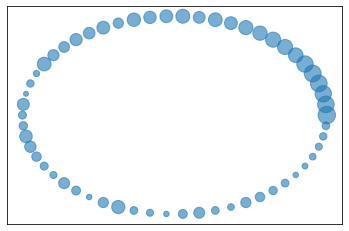

In [24]:
#布局模型
pos=nx.circular_layout(G)
nx.draw_networkx_nodes(G,pos,alpha=0.6,node_size = 20 + Gdegree.degree *5)

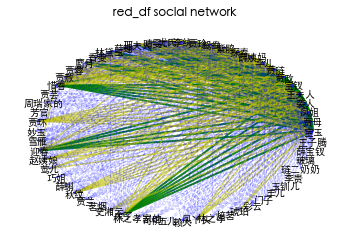

In [26]:
# nodes根据节点的入度和初度来设置节点的大小

nx.draw_networkx_edges(G,pos,edgelist=elarge,width=2,alpha=0.9,edge_color='g')#alpha是透明度，width是连接线的宽度
nx.draw_networkx_edges(G,pos,edgelist=emidle,width=1.5,alpha=0.6,edge_color='y')
nx.draw_networkx_edges(G,pos,edgelist=esmall,width=1,alpha=0.2,edge_color='b',style='dashed')
nx.draw_networkx_labels(G,pos,font_size=10,font_family="SimHei") 


plt.axis('off')
plt.title("red_df social network")
plt.show()